In [1]:
import DirectDmTargets as dddm

calculating effective efficancy for Xe detector done
calculating effective efficancy for Ar detector done
calculating effective efficancy for Ge detector done


In [2]:
import wimprates as wr

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numericalunits as nu

In [5]:
from tqdm import tqdm

In [6]:
from scipy.integrate import quad as scipy_int

In [7]:
import pandas as pd

In [8]:
import scipy

In [9]:
import emcee
emcee.__version__

'3.0.0'

In [10]:
import corner

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

# Emcee #
<https://emcee.readthedocs.io/en/stable/tutorials/quickstart/>

## Distribution of the DM ##
First we need to make a DM-rate spectrum

## Xe ##

In [11]:
use_SHM = dddm.SHM()
xe_events = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors['Xe'])
xe_data = xe_events.get_data(poisson = False)
xe_data

,counts,bin_centers,bin_left,bin_right
0,20.543476,5.0,0.0,10.0
1,156.624879,15.0,10.0,20.0
2,64.765430,25.0,20.0,30.0
3,22.123232,35.0,30.0,40.0
4,6.992244,45.0,40.0,50.0
5,2.005902,55.0,50.0,60.0
6,0.504013,65.0,60.0,70.0
7,0.103457,75.0,70.0,80.0
8,0.014957,85.0,80.0,90.0
9,0.001162,95.0,90.0,100.0


In [14]:
stats = dddm.MCMCStatModel("Ar")
stats.show_walkers()
# test = stats.check_spectrum()
# stats.set_pos().T.shape

stat_model::initialized for Ar detector. See print(stat_model) for default settings


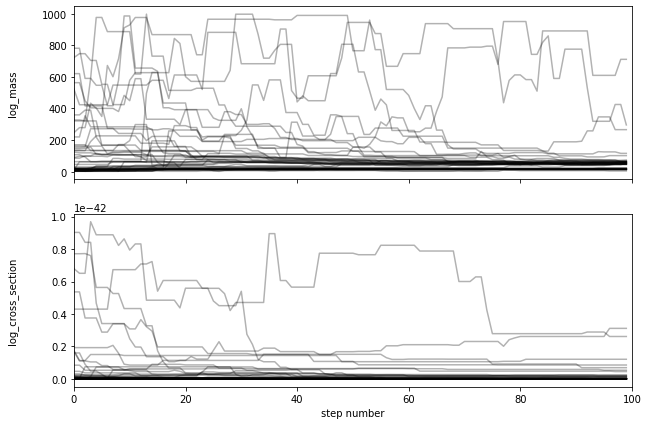

In [16]:
stats.show_walkers()

C:\Users\Joran\Anaconda3\envs\DD_DM\lib\site-packages\emcee\ensemble.py:258: RuntimeWarning: Initial state is not linearly independent and it will not allow a full exploration of parameter space
  category=RuntimeWarning,
  0%|                                                                                       | 0/100 [00:00<?, ?it/s]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_c

  1%|▊                                                                              | 1/100 [00:01<02:38,  1.60s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.in

  2%|█▌                                                                             | 2/100 [00:02<02:29,  1.53s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value 

  3%|██▎                                                                            | 3/100 [00:04<02:35,  1.60s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding

  4%|███▏                                                                           | 4/100 [00:06<02:36,  1.63s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negati

  5%|███▉                                                                           | 5/100 [00:08<02:39,  1.68s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


  6%|████▋                                                                          | 6/100 [00:09<02:31,  1.61s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negati

  7%|█████▌                                                                         | 7/100 [00:11<02:26,  1.58s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.in

  8%|██████▎                                                                        | 8/100 [00:12<02:27,  1.60s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


  9%|███████                                                                        | 9/100 [00:14<02:31,  1.66s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returni

 10%|███████▊                                                                      | 10/100 [00:16<02:29,  1.66s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negati

 11%|████████▌                                                                     | 11/100 [00:17<02:22,  1.60s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 12%|█████████▎                                                                    | 12/100 [00:19<02:34,  1.76s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value 

 13%|██████████▏                                                                   | 13/100 [00:21<02:38,  1.82s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returni

 14%|██████████▉                                                                   | 14/100 [00:23<02:29,  1.74s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 15%|███████████▋                                                                  | 15/100 [00:25<02:32,  1.80s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.in

 16%|████████████▍                                                                 | 16/100 [00:27<02:27,  1.76s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value 

 17%|█████████████▎                                                                | 17/100 [00:28<02:25,  1.75s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 18%|██████████████                                                                | 18/100 [00:30<02:29,  1.82s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 19%|██████████████▊                                                               | 19/100 [00:32<02:30,  1.86s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding

 20%|███████████████▌                                                              | 20/100 [00:34<02:20,  1.76s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 21%|████████████████▍                                                             | 21/100 [00:36<02:24,  1.83s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 22%|█████████████████▏                                                            | 22/100 [00:38<02:28,  1.90s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 23%|█████████████████▉                                                            | 23/100 [00:40<02:31,  1.97s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 24%|██████████████████▋                                                           | 24/100 [00:42<02:34,  2.04s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 25%|███████████████████▌                                                          | 25/100 [00:44<02:37,  2.10s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returni

 26%|████████████████████▎                                                         | 26/100 [00:46<02:30,  2.03s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 27%|█████████████████████                                                         | 27/100 [00:48<02:24,  1.99s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 28%|█████████████████████▊                                                        | 28/100 [00:50<02:21,  1.96s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section

 29%|██████████████████████▌                                                       | 29/100 [00:52<02:12,  1.86s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 30%|███████████████████████▍                                                      | 30/100 [00:54<02:26,  2.09s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 31%|████████████████████████▏                                                     | 31/100 [00:56<02:18,  2.01s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 32%|████████████████████████▉                                                     | 32/100 [00:58<02:21,  2.08s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negati

 33%|█████████████████████████▋                                                    | 33/100 [01:00<02:14,  2.01s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding

 34%|██████████████████████████▌                                                   | 34/100 [01:02<02:10,  1.98s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 35%|███████████████████████████▎                                                  | 35/100 [01:04<02:04,  1.92s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 36%|████████████████████████████                                                  | 36/100 [01:06<02:08,  2.00s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value 

 37%|████████████████████████████▊                                                 | 37/100 [01:08<02:04,  1.98s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.in

 38%|█████████████████████████████▋                                                | 38/100 [01:10<02:02,  1.98s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 39%|██████████████████████████████▍                                               | 39/100 [01:12<02:04,  2.03s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 40%|███████████████████████████████▏                                              | 40/100 [01:14<02:06,  2.11s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_c

 41%|███████████████████████████████▉                                              | 41/100 [01:17<02:06,  2.14s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negati

 42%|████████████████████████████████▊                                             | 42/100 [01:18<01:57,  2.03s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 43%|█████████████████████████████████▌                                            | 43/100 [01:21<01:59,  2.10s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 44%|██████████████████████████████████▎                                           | 44/100 [01:23<02:02,  2.19s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 45%|███████████████████████████████████                                           | 45/100 [01:26<02:07,  2.32s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 46%|███████████████████████████████████▉                                          | 46/100 [01:28<02:08,  2.38s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 47%|████████████████████████████████████▋                                         | 47/100 [01:31<02:07,  2.40s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 48%|█████████████████████████████████████▍                                        | 48/100 [01:33<02:09,  2.49s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 49%|██████████████████████████████████████▏                                       | 49/100 [01:36<02:10,  2.56s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.in

 50%|███████████████████████████████████████                                       | 50/100 [01:38<02:00,  2.41s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 51%|███████████████████████████████████████▊                                      | 51/100 [01:41<01:58,  2.41s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returni

 52%|████████████████████████████████████████▌                                     | 52/100 [01:42<01:46,  2.22s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 53%|█████████████████████████████████████████▎                                    | 53/100 [01:44<01:41,  2.16s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 54%|██████████████████████████████████████████                                    | 54/100 [01:46<01:39,  2.16s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 55%|██████████████████████████████████████████▉                                   | 55/100 [01:49<01:38,  2.18s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 56%|███████████████████████████████████████████▋                                  | 56/100 [01:51<01:39,  2.26s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 57%|████████████████████████████████████████████▍                                 | 57/100 [01:53<01:37,  2.28s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 58%|█████████████████████████████████████████████▏                                | 58/100 [01:56<01:39,  2.36s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 59%|██████████████████████████████████████████████                                | 59/100 [01:59<01:38,  2.40s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 60%|██████████████████████████████████████████████▊                               | 60/100 [02:00<01:30,  2.26s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 61%|███████████████████████████████████████████████▌                              | 61/100 [02:03<01:29,  2.31s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 62%|████████████████████████████████████████████████▎                             | 62/100 [02:05<01:29,  2.36s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 63%|█████████████████████████████████████████████████▏                            | 63/100 [02:08<01:26,  2.32s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 64%|█████████████████████████████████████████████████▉                            | 64/100 [02:10<01:24,  2.34s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.in

 65%|██████████████████████████████████████████████████▋                           | 65/100 [02:12<01:16,  2.20s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 66%|███████████████████████████████████████████████████▍                          | 66/100 [02:15<01:20,  2.36s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.in

 67%|████████████████████████████████████████████████████▎                         | 67/100 [02:17<01:15,  2.28s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 68%|█████████████████████████████████████████████████████                         | 68/100 [02:20<01:18,  2.46s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 69%|█████████████████████████████████████████████████████▊                        | 69/100 [02:23<01:22,  2.66s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 70%|██████████████████████████████████████████████████████▌                       | 70/100 [02:26<01:27,  2.92s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 71%|███████████████████████████████████████████████████████▍                      | 71/100 [02:29<01:24,  2.93s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value 

 72%|████████████████████████████████████████████████████████▏                     | 72/100 [02:32<01:19,  2.83s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 73%|████████████████████████████████████████████████████████▉                     | 73/100 [02:34<01:15,  2.79s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 74%|█████████████████████████████████████████████████████████▋                    | 74/100 [02:37<01:10,  2.71s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 75%|██████████████████████████████████████████████████████████▌                   | 75/100 [02:40<01:07,  2.69s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 76%|███████████████████████████████████████████████████████████▎                  | 76/100 [02:44<01:14,  3.12s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 77%|████████████████████████████████████████████████████████████                  | 77/100 [02:47<01:13,  3.19s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 78%|████████████████████████████████████████████████████████████▊                 | 78/100 [02:50<01:09,  3.17s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 79%|█████████████████████████████████████████████████████████████▌                | 79/100 [02:53<01:06,  3.17s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding

 80%|██████████████████████████████████████████████████████████████▍               | 80/100 [02:57<01:04,  3.21s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 81%|███████████████████████████████████████████████████████████████▏              | 81/100 [03:00<01:01,  3.26s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 82%|███████████████████████████████████████████████████████████████▉              | 82/100 [03:04<00:59,  3.32s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 83%|████████████████████████████████████████████████████████████████▋             | 83/100 [03:07<00:58,  3.42s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 84%|█████████████████████████████████████████████████████████████████▌            | 84/100 [03:11<00:55,  3.46s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 85%|██████████████████████████████████████████████████████████████████▎           | 85/100 [03:14<00:51,  3.45s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 86%|███████████████████████████████████████████████████████████████████           | 86/100 [03:17<00:46,  3.34s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 87%|███████████████████████████████████████████████████████████████████▊          | 87/100 [03:20<00:42,  3.26s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 88%|████████████████████████████████████████████████████████████████████▋         | 88/100 [03:24<00:39,  3.32s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 89%|█████████████████████████████████████████████████████████████████████▍        | 89/100 [03:27<00:36,  3.28s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 90%|██████████████████████████████████████████████████████████████████████▏       | 90/100 [03:30<00:32,  3.22s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 91%|██████████████████████████████████████████████████████████████████████▉       | 91/100 [03:33<00:28,  3.22s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 92%|███████████████████████████████████████████████████████████████████████▊      | 92/100 [03:37<00:26,  3.37s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 93%|████████████████████████████████████████████████████████████████████████▌     | 93/100 [03:41<00:24,  3.49s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 94%|█████████████████████████████████████████████████████████████████████████▎    | 94/100 [03:45<00:22,  3.78s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 95%|██████████████████████████████████████████████████████████████████████████    | 95/100 [03:49<00:18,  3.64s/it]

finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 96%|██████████████████████████████████████████████████████████████████████████▉   | 96/100 [03:52<00:14,  3.63s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf


 97%|███████████████████████████████████████████████████████████████████████████▋  | 97/100 [03:56<00:10,  3.59s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 98%|████████████████████████████████████████████████████████████████████████████▍ | 98/100 [04:00<00:07,  3.72s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf


 99%|█████████████████████████████████████████████████████████████████████████████▏| 99/100 [04:03<00:03,  3.56s/it]

finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_cross_section, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_mass, returning -np.inf
finding a negative value for log_cross_section, returning -np.in

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [04:06<00:00,  2.46s/it]


Removing a fraction of 0.2 of the samples
(250, 2)


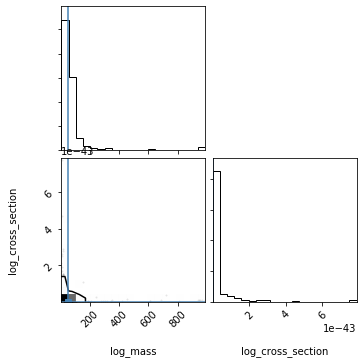

In [15]:
stats.show_corner()

In [ ]:
asser False

In [ ]:
nwalkers= 10
pos = np.hstack(
    [50   + 3*10 * np.random.rand(nwalkers, 1) ,
    1e-45 + 1e-45 * np.random.rand(nwalkers, 1),
    230   + 3*30 * np.random.rand(nwalkers, 1),
    544   + 3*33 * np.random.rand(nwalkers, 1),
    0.4   + 3*0.1 * np.random.rand(nwalkers, 1)   
    ])
nwalkers, ndim = pos.shape
pos

In [ ]:
%%time
# from multiprocessing import Pool
# with Pool() as pool:
nwalkers = 50
step = 250
pos = np.hstack(
    [50   + 3*10 * np.random.rand(nwalkers, 1) ,
    1e-45 + 1e-45 * np.random.rand(nwalkers, 1),
    230   + 3*30 * np.random.rand(nwalkers, 1),
    544   + 3*33 * np.random.rand(nwalkers, 1),
    0.4   + 3*0.1 * np.random.rand(nwalkers, 1)   
    ])
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, 
                dddm.log_probability_detector, args=(xe_data['bin_centers'],
                                                            xe_data['counts'],
                                                           ['log_mass',
                                                            'log_cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density'])
#                                     pool=pool
                               )

In [ ]:
sampler.run_mcmc(np.abs(pos), step, progress=False);

In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ['mass',
                                          'cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=int(step*0.2), thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples, labels=['log_mass',
                                          'log_cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density'], 
                    truths=[50, 1e-45, 230, 544, 0.3]);

In [ ]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

## Ge ##

In [ ]:
ge_events = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors['Ge'])
ge_data = ge_events.get_data(poisson = False)
ge_data

In [ ]:
%%time
# from multiprocessing import Pool
# with Pool() as pool:
nwalkers = 50
step = 250
pos = np.hstack(
    [50   + 3*10 * np.random.rand(nwalkers, 1) ,
    1e-45 + 1e-45 * np.random.rand(nwalkers, 1),
    230   + 3*30 * np.random.rand(nwalkers, 1),
    544   + 3*33 * np.random.rand(nwalkers, 1),
    0.4   + 3*0.1 * np.random.rand(nwalkers, 1)   
    ])
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, 
                dddm.log_probability_detector, args=(ge_data['bin_centers'],
                                                            ge_data['counts'],
                                                           ['log_mass',
                                                            'log_cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density'])
#                                     pool=pool
                               )

In [ ]:
sampler.run_mcmc(np.abs(pos), step, progress=True);

In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ['mass',
                                          'cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=int(step*0.2), thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples, labels=['log_mass',
                                          'log_cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density'], 
                    truths=[50, 1e-45, 230, 544, 0.3]);

In [ ]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))

## Ar ##

In [ ]:
ar_events = dddm.DetectorSpectrum(50, 1e-45, use_SHM, dddm.detectors['Ar'])
ar_data = ar_events.get_data(poisson = False)
ar_data

In [ ]:
%%time
# from multiprocessing import Pool
# with Pool() as pool:
nwalkers = 50
step = 250
pos = np.hstack(
    [50   + 3*10 * np.random.rand(nwalkers, 1) ,
    1e-45 + 1e-45 * np.random.rand(nwalkers, 1),
    230   + 3*30 * np.random.rand(nwalkers, 1),
    544   + 3*33 * np.random.rand(nwalkers, 1),
    0.4   + 3*0.1 * np.random.rand(nwalkers, 1)   
    ])
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, 
                dddm.log_probability_detector, args=(ar_data['bin_centers'],
                                                            ar_data['counts'],
                                                           ['log_mass',
                                                            'log_cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density'])
#                                     pool=pool
                               )

In [ ]:
sampler.run_mcmc(np.abs(pos), step, progress=False);

In [ ]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ['mass',
                                          'cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density']
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
flat_samples = sampler.get_chain(discard=int(step*0.2), thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples, labels=['log_mass',
                                          'log_cross_section', 
                                                            'v_0',
                                                            'v_esc', 
                                                            'density'], 
                    truths=[50, 1e-45, 230, 544, 0.3]);

In [ ]:
print("Mean acceptance fraction: {0:.3f}"
                .format(np.mean(sampler.acceptance_fraction)))